In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.seasonal import STL
from statsmodels.tsa.arima.model import ARIMA


In [2]:
df = pd.read_csv("../data/processed/cars_processed.csv")

# Группировка по годам
ts = df.groupby("year")["price"].mean()

# Превратим в временной ряд с индексом DatetimeIndex
ts.index = pd.to_datetime(ts.index, format="%Y")

ts.head()


year
1980-01-01    12848.700000
1981-01-01     7893.823529
1982-01-01     8429.500000
1983-01-01     7288.888889
1984-01-01     5892.000000
Name: price, dtype: float64

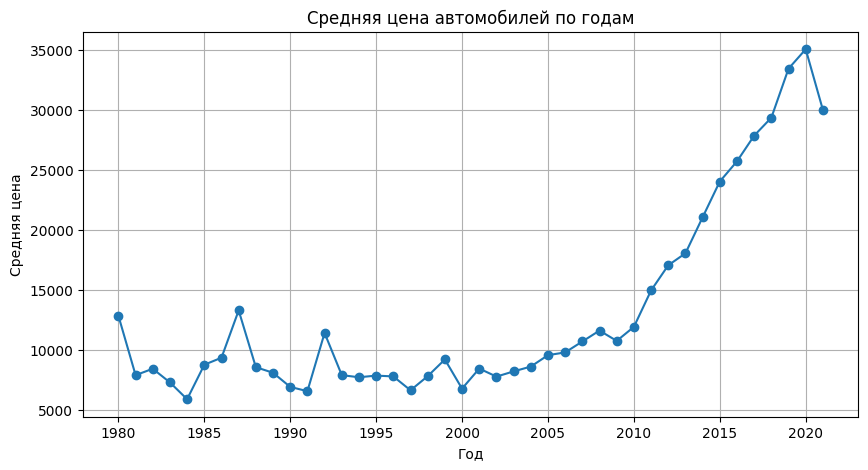

In [3]:
plt.figure(figsize=(10,5))
plt.plot(ts, marker="o")
plt.title("Средняя цена автомобилей по годам")
plt.xlabel("Год")
plt.ylabel("Средняя цена")
plt.grid(True)
plt.show()


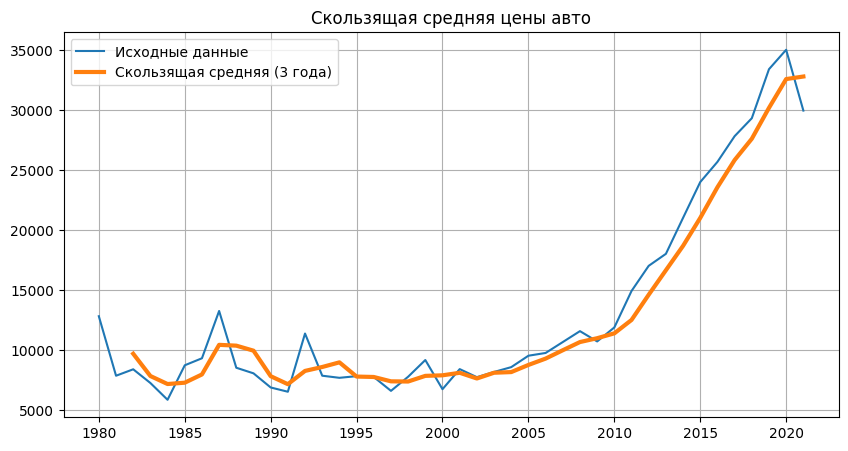

In [4]:
ts_ma = ts.rolling(window=3).mean()

plt.figure(figsize=(10,5))
plt.plot(ts, label="Исходные данные")
plt.plot(ts_ma, label="Скользящая средняя (3 года)", linewidth=3)
plt.legend()
plt.title("Скользящая средняя цены авто")
plt.grid(True)
plt.show()


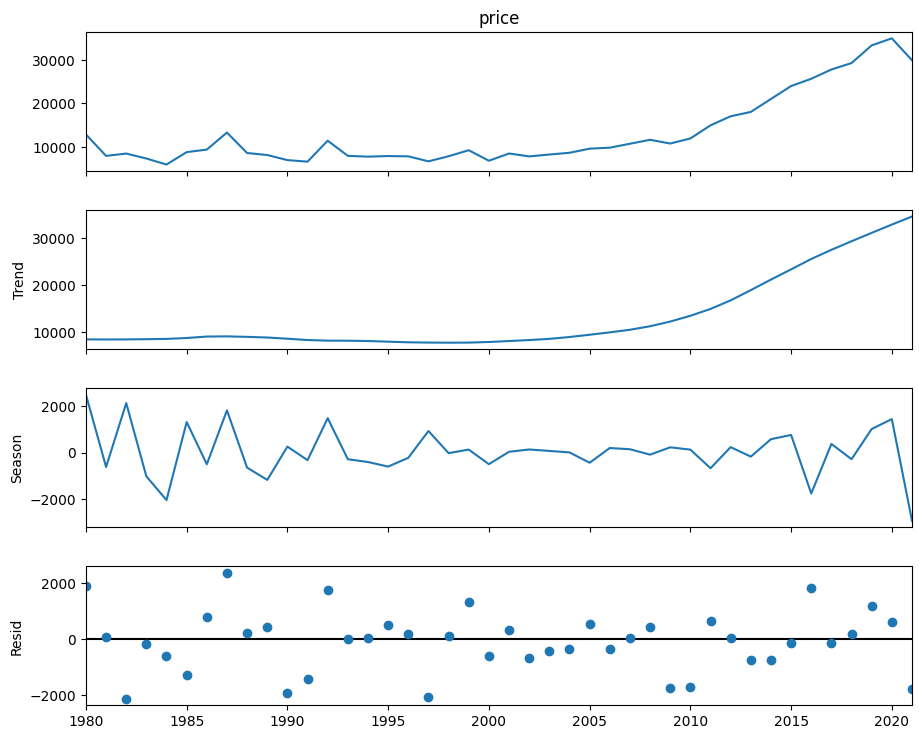

In [5]:
stl = STL(ts, period=5)
result = stl.fit()

fig = result.plot()
fig.set_size_inches(10, 8)
plt.show()


In [6]:
model = ARIMA(ts, order=(1, 1, 1))
model_fit = model.fit()

# прогноз на 3 года вперед
forecast = model_fit.forecast(steps=3)
forecast


C:\Users\panda\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\panda\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\panda\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\panda\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\panda\AppData\Roaming\Python\Pytho

2022-01-01    30936.146361
2023-01-01    30557.241635
2024-01-01    30705.387713
Freq: YS-JAN, Name: predicted_mean, dtype: float64

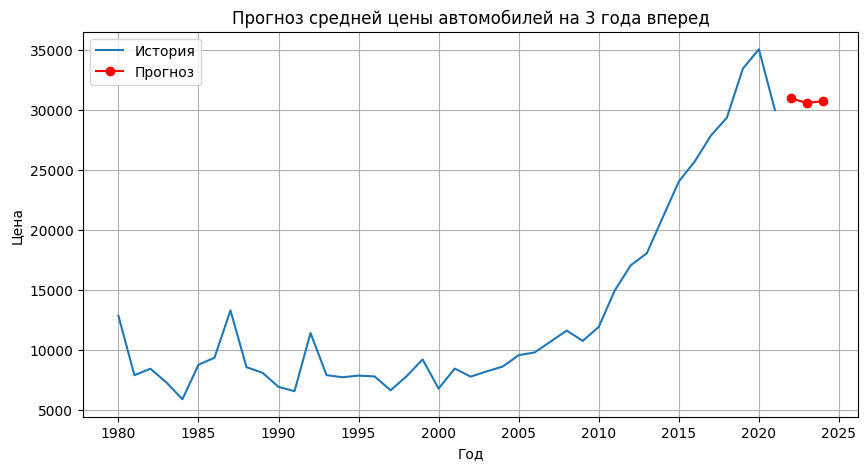

In [7]:
plt.figure(figsize=(10,5))
plt.plot(ts, label="История")
plt.plot(forecast.index, forecast.values, marker="o", label="Прогноз", color="red")
plt.title("Прогноз средней цены автомобилей на 3 года вперед")
plt.xlabel("Год")
plt.ylabel("Цена")
plt.legend()
plt.grid(True)
plt.show()
